In [18]:
# importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [19]:
# importing the dataset
dataset = pd.read_csv('Heart Attack Data Set.csv')

# split the data into inputs and outputs
x = dataset.iloc[:, [0,1, 2,3,4, 5,  6,7, 8,9,10, 11, 12]].values  
y = dataset.iloc[:, 13].values  # Select 'target'

In [20]:
dataset.value_counts()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  ca  thal  target
38   1    2   138       175   0    1        173      0      0.0      2      4   2     1         2
59   1    0   110       239   0    0        142      1      1.2      1      1   3     0         1
          2   126       218   1    1        134      0      2.2      1      1   1     0         1
          1   140       221   0    1        164      1      0.0      2      0   2     1         1
          0   170       326   0    0        140      1      3.4      0      0   3     0         1
                                                                                               ..
51   1    2   94        227   0    1        154      1      0.0      2      1   3     1         1
          0   140       299   0    1        173      1      1.6      2      0   3     0         1
                        298   0    1        122      1      4.2      1      3   3     0         1
                        2

In [21]:
#Import Module
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(x, y,
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=42)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Closer neighbors get higher weights, while farther neighbors get lower weights.

knn=KNeighborsClassifier(n_neighbors=17,metric='manhattan', weights='distance')
knn.fit(train_x,train_y)
y_pred=knn.predict(test_x)
accuracy=metrics.accuracy_score(test_y,y_pred)
print("testing accuracy=",accuracy*100, "%")


from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

# Closer neighbors get higher weights, while farther neighbors get lower weights.

knn=KNeighborsClassifier(n_neighbors=5,metric='euclidean', weights='distance')
knn.fit(train_x,train_y)
y_pred=knn.predict(test_x)
accuracy=metrics.accuracy_score(test_y,y_pred)
print("testing accuracy=",accuracy*100, "%")

testing accuracy= 77.04918032786885 %
testing accuracy= 70.49180327868852 %


[[19 10]
 [ 8 24]]


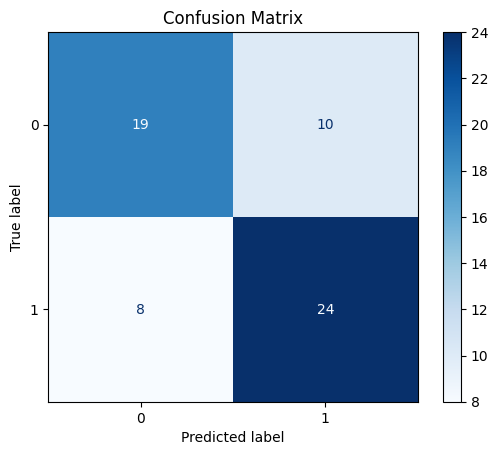

In [23]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm= confusion_matrix(test_y,y_pred)
print(cm)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(test_y))
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

In [24]:
from sklearn.metrics import classification_report
cr= classification_report(test_y, y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.70      0.66      0.68        29
           1       0.71      0.75      0.73        32

    accuracy                           0.70        61
   macro avg       0.70      0.70      0.70        61
weighted avg       0.70      0.70      0.70        61



score= 0.7025862068965517


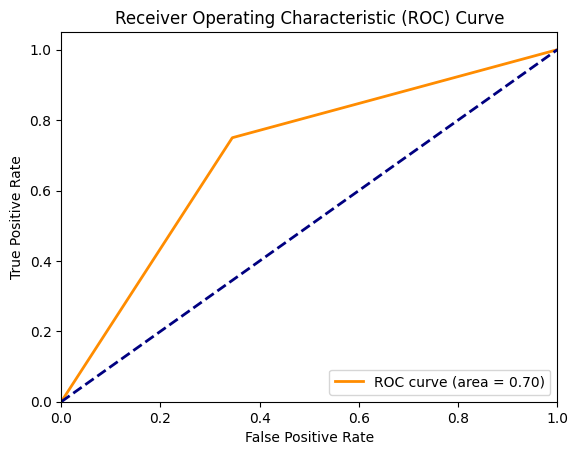

In [25]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
roc_auc = roc_auc_score(test_y, y_pred)
print(f'score= {roc_auc}')
fpr, tpr, thresholds = roc_curve(test_y, y_pred)
roc_auc_value = auc(fpr, tpr)
# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_value:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [26]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_values=range (1,26)
scores_list=[]
for k in k_values:
  knn=KNeighborsClassifier(n_neighbors=k,metric='euclidean', weights='distance')
  knn.fit(train_x,train_y)
  y_pred=knn.predict(test_x)
  scores_list.append(metrics.accuracy_score(test_y,y_pred))

Text(0, 0.5, 'testing accuracy')

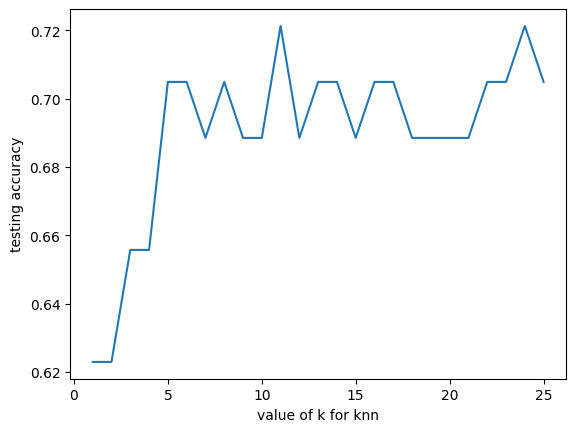

In [27]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(k_values,scores_list)
plt.xlabel('value of k for knn')
plt.ylabel('testing accuracy')